## ASAS-SN SkyPatrol Python API Demo

The pyasassn client allows users to query the ASAS-SN input catalog and retrieve light curves from our database. These light curves are subject to live updates as we are running continuous photometry on our nightly images.



### Installation

Make sure your pip points to the appropriate Python >= 3.8 installation...
<pre><code>
    # Install directly from github
    git clone https://github.com/asas-sn/skypatrol.git
    pip3 install skypatrol/ 
    
    # OR, pull from pipy to install
    python3 -m pip install pyasassn
</code></pre>

### Tutorial

Create a SkyPatrolClient object. The client will automatically ping the server for the most recent catalog data.

In [1]:
from pyasassn.client import SkyPatrolClient

client = SkyPatrolClient()
client.catalogs

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.12 (30 June 2023)
Please upgrade your client if not up to date.




Table Name:  stellar_main
Num Columns: 47
Num Targets: 98932961

Table Name:  master_list
Num Columns: 4
Num Targets: 109300848

Table Name:  asassn_discoveries
Num Columns: 11
Num Targets: 5716

Table Name:  comets
Num Columns: 1
Num Targets: 13935

Table Name:  swift
Num Columns: 56
Num Targets: 254936

Table Name:  allwiseagn
Num Columns: 15
Num Targets: 1354900

Table Name:  mdwarf
Num Columns: 32
Num Targets: 8927

Table Name:  glade_tmassx
Num Columns: 20
Num Targets: 1125414

Table Name:  glade_gwgc
Num Columns: 20
Num Targets: 52399

Table Name:  m_giants
Num Columns: 12
Num Targets: 4879809

Table Name:  glade_pgc
Num Columns: 20
Num Targets: 52400

Table Name:  glade_hyperleda
Num Columns: 20
Num Targets: 2459906

Table Name:  glade_sdssqso
Num Columns: 20
Num Targets: 297152

Table Name:  milliquas
Num Columns: 21
Num Targets: 1979676

Table Name:  fermi
Num Columns: 67
Num Targets: 5788

Table Name:  aavsovsx
Num Columns: 28
Num Targets: 1437528

Table Name:  morx
Num Colu

#### Main Catalog

The __stellar_main__ catalog contains the bulk of our targets. It was built off of ATLAS REFCAT2 and contains GAIA, TESS, SDSS, and ALLWISE identifiers where available.

In [2]:
client.catalogs.stellar_main.head(12)

col_names  dtypes
0   asas_sn_id  bigint
1       ra_deg  double
2      dec_deg  double
3    refcat_id  bigint
4      gaia_id  bigint
5       hip_id  string
6       tyc_id  string
7     tmass_id  string
8      sdss_id  string
9   allwise_id  string
10      tic_id  bigint
11         plx   float

#### HEASARC Catalogs

The remaining catalogs were sourced from NASA's HEASARC archive. Each of these retains its original columnar data, though we have appended an __asas_sn_id__ for all of them.

In [3]:
client.catalogs.aavsovsx.head(12)

col_names  dtypes
0         asas_sn_id  bigint
1             ra_deg  double
2            dec_deg  double
3      source_number  bigint
4               name  string
5   variability_flag  bigint
6                lii  double
7                bii  double
8   variability_type  string
9       max_mag_type  double
10     max_mag_limit  string
11           max_mag  double

#### The Master List

The __master_list__ contains __asas_sn_ids__ coordinates and catalog sources for all of our targets. All of our catalogs are cross-matched on the master list with a 2-arcsecond cone. 

In [4]:
client.catalogs.master_list

col_names         dtypes
0       asas_sn_id         bigint
1           ra_deg         double
2          dec_deg         double
3  catalog_sources  array<string>

### Cone Seach

Lets run a simple cone-search on the master list. 

In [5]:
client.cone_search(ra_deg=271, dec_deg=-88, radius=1, catalog='master_list')

asas_sn_id      ra_deg    dec_deg                catalog_sources
0     17181130829  255.536591 -88.848616            [stellar_main, tic]
1     17181204967  277.739951 -88.721749  [stellar_main, tic, aavsovsx]
2     17181205122  287.709598 -88.721714            [stellar_main, tic]
3     17181204800  258.612849 -88.721789            [stellar_main, tic]
4     17181204805  264.100243 -88.721851            [stellar_main, tic]
...           ...         ...        ...                            ...
9440      1100141  282.600469 -87.306914            [stellar_main, tic]
9441      1099951  278.373369 -87.306855            [stellar_main, tic]
9442      1099225  254.544061 -87.306915            [stellar_main, tic]
9443      1099949  276.025395 -87.306877            [stellar_main, tic]
9444      1100137  279.174853 -87.306928            [stellar_main, tic]

[9445 rows x 4 columns]

### Random Curves 

For whatever reason, if you are interested in random targets from a given catalog, we can give you those too.

In [6]:
client.random_sample(1000, catalog="aavsovsx")

asas_sn_id     ra_deg   dec_deg                 name
0    661428161324  270.16500 -29.24422  OGLE-BLG-ECL-245419
1    661428515859  273.80225 -23.08714  OGLE-BLG-ELL-023556
2    661428103428  271.03479 -29.73122  OGLE-BLG-ECL-283386
3    661428023462  269.82529 -30.54175  OGLE-BLG-LPV-159847
4    661428557471  239.59740 -21.86635       EPIC 204553379
..            ...        ...       ...                  ...
995  661428654815  283.02461  -6.89283  GDS_J1852059-065334
996  661427934733  268.53229 -32.12139  OGLE-BLG-LPV-108408
997  661428175509  262.53108 -29.12128  OGLE-BLG-ECL-022114
998  661428789292  295.35308  22.13200      IRAS 19392+2200
999  661428509887  263.45358 -23.24856  OGLE-BLG-ECL-031734

[1000 rows x 4 columns]

### Query Lists

If you have a list of external identifiers you can query our catalogs using these. 

In [7]:
my_tic_ids = [6658326, 46783395, 1021890]
client.query_list(my_tic_ids, catalog='stellar_main', id_col='tic_id')

asas_sn_id      ra_deg    dec_deg    tic_id
0  335007699083   97.045759  18.214838  46783395
1  335007693701   81.164422  18.222147   6658326
2  309238124040  329.260377  -8.035864   1021890

For other catalogs you can search by name.

In [8]:
my_vso_id = 'ASASSN-V J182608.32-864925.1'
client.query_list(my_vso_id, catalog='aavsovsx', id_col='name')

asas_sn_id     ra_deg   dec_deg                          name
0  17181129184  276.53493 -86.82375  ASASSN-V J182608.32-864925.1

### ADQL Queries

We have inculded a custom ADQL parser. That will allow users to query targets using this familiar SQL-like language. 
First, take note how we can use this to perform a cone-search.


In [9]:
query = """
SELECT 
 * 
FROM stellar_main 
WHERE DISTANCE(ra_deg, dec_deg, 270, 88) <= ARCMIN(7.1)
"""
client.adql_query(query)

asas_sn_id      ra_deg    dec_deg           refcat_id  \
0     8590499342  266.760769  87.994154  213592667607683838   
1   317828596975  269.865452  88.066775  213682698654510985   
2   317828589462  269.677367  88.056602  213662696773678777   
3   317828578914  267.796802  88.027542  213632677968013904   
4   317828643144  269.544358  87.885949  213462695443583992   
..           ...         ...        ...                 ...   
79  317828585831  268.773057  88.043282  213652687730562793   
80    8590481418  270.792135  87.964613  213552707921348389   
81  317828603270  269.620495  88.089628  213702696204958408   
82    8590486106  269.331190  87.973159  213562693311908645   
83    8590495180  270.320947  87.989326  213582703209478045   

                gaia_id hip_id tyc_id tmass_id sdss_id allwise_id  ...  \
0   1728180804235224448   None   None     None    None       None  ...   
1   1728181491429914880   None   None     None    None       None  ...   
2   1728181491429914240   None   None     None    None       None  ...   
3   1728181010393572736   None   None     None    None       None  ...   
4   1728163967963342336   None   None     None    None       None  ...   
..                  ...    ...    ...      ...     ...        ...  ...   
79  1728181422710436608   None   None     None    None       None  ...   
80  2305235980012128896   None   None     None    None       None  ...   
81  1728184583806368128   None   None     None    None       None  ...   
82  1728168331650117632   None   None     None    None       None  ...   
83  2305241924246866304   None   None     None    None       None  ...   

    pstarrs_r_mag_contrib  pstarrs_i_mag  pstarrs_i_mag_d  pstarrs_i_mag_chi  \
0                      21      15.881000            0.011               1.84   
1                       5      17.815001            0.011               0.18   
2                      23      14.768000            0.009               0.28   
3                      23      15.664000            0.009               4.65   
4                      23      14.770000            0.008               0.06   
..                    ...            ...              ...                ...   
79                      5      16.090000            0.010               0.09   
80                     17      15.279000            0.032               0.00   
81                      5      15.850000            0.010               0.13   
82                     17      13.438000            0.020               0.48   
83                     19      12.945000            0.012               0.25   

    pstarrs_i_mag_contrib  pstarrs_z_mag  pstarrs_z_mag_d  pstarrs_z_mag_chi  \
0                      21      15.802000            0.011               0.02   
1                       5      17.771999            0.012               0.05   
2                      23      14.660000            0.009               0.12   
3                      23      15.583000            0.009               0.04   
4                      23      14.736000            0.008               0.08   
..                    ...            ...              ...                ...   
79                      5      16.033001            0.011               0.03   
80                     17      15.243000            0.100               0.00   
81                      5      15.779000            0.011               0.08   
82                     17      13.071000            0.100               0.00   
83                     19      12.860000            0.015               0.00   

    pstarrs_z_mag_contrib  nstat  
0                       5      0  
1                       5      0  
2                       7      0  
3                       7      0  
4                       7      0  
..                    ...    ...  
79                      5      0  
80                      1      0  
81                      5      0  
82                      1      0  
83                      3      0  

[84 rows x 47 col

##### JOINS
Since we have cross matched all of our catalogs. We can use ADQL to explore targets accross catalogs.

In [10]:
query = """
SELECT 
 asas_sn_id,
 chandra.name AS c_name,
 fermi.name 
FROM chandra 
JOIN fermi USING(asas_sn_id) 
"""
client.adql_query(query)

asas_sn_id                 c_name               name
0  661430449133  2CXO J111506.1-611831  4FGL J1115.1-6118
1  661430429038  2CXO J170112.5-300622  4FGL J1701.2-3006
2  661430406107  2CXO J134117.0+395824  4FGL J1341.2+3958
3  661430407082  2CXO J123051.0+122316  4FGL J1230.8+1223
4  661430339024  2CXO J115324.2+493101  4FGL J1153.4+4931

#### Complex Searches

Lets say we were searching for white dwarfs that crossmatched in the VSO catalog.

In [11]:
query = """
SELECT 
  asas_sn_id,
  gaia_id,
  pstarrs_g_mag,
  (gaia_mag - (5 * LOG10(plx) - 10)) AS g_mag_abs, 
  name 
FROM stellar_main 
JOIN aavsovsx USING(asas_sn_id)
WHERE 1=1
 AND pstarrs_g_mag < 14 
 AND (gaia_mag - (5 * LOG10(plx) - 10)) > 10
 AND (gaia_b_mag - gaia_r_mag) < 1.5 
"""
client.adql_query(query)

asas_sn_id              gaia_id  pstarrs_g_mag  g_mag_abs  \
0              6722  4631767739315754752         13.648  20.846601   
1            864158   553789891988096768         12.953  24.751019   
2           1362802  2077202624234414848         12.589  20.375944   
3        8590564553  2080276485092089984         13.043  21.908320   
4        8591012526  1129377838216370560         13.993  21.510170   
...             ...                  ...            ...        ...   
86597  661425292747  5336254496038515456         11.429  18.982231   
86598  661425414760  5335819295596232704          8.499  18.023147   
86599  661425468029  5242162826412463744         13.500  25.900394   
86600  661425506954  5256710052425713280         13.047  25.216660   
86601  661425515987  5291270417276111360         10.821  12.848771   

                               name  
0               ASAS J005856-7941.3  
1             WISE J052305.6+800943  
2                       KIC 7135294  
3                       KIC 9604418  
4      ASASSN-V J104322.57+774413.9  
...                             ...  
86597           ASAS J114042-5934.9  
86598           ASAS J114101-6036.8  
86599           GDS_J1049113-605424  
86600  ASASSN-V J100021.85-595906.8  
86601                     V0463 Car  

[86570 rows x 5 columns]

#### Downloading Curves

Any of the previous functions can take __download=True__ as a parameter to download the lightcurves coresponding to these targets. 

The client will return a LightCurveCollection object which can be used for further analysis and plotting.

In [12]:
# Downloads about 10k curves/min per core in Hawaii or US, or 1k curves/min core in EU or Asia (latency dependent)
lcs = client.random_sample(2000, catalog='aavsovsx', download=True, threads=2)
lcs

Pulled 2,000 of 2,000


LightCurveCollection with 2000 light curves 
        asas_sn_id     ra_deg   dec_deg                          name
0     635655335674  267.82093 -56.20099  ASASSN-V J175117.02-561203.6
1     206158664985  253.05150  57.72547               GSC 03885-00583
2     661428237676  271.01100 -28.48325           OGLE-BLG-ECL-282426
3     661428252294  263.02371 -28.33492          OGLE-BLG-RRLYR-19922
4     661428386592  270.34267 -26.50544           OGLE-BLG-ECL-253478
...            ...        ...       ...                           ...
1995  661428587450  267.63067 -19.94928           OGLE-BLG-ELL-007743
1996  661427922530  271.53800 -32.39931           OGLE-BLG-ECL-305096
1997  403727470199  214.50903 -47.82393  ASASSN-V J141802.17-474926.1
1998  661428764489  202.37596  16.40990   PS1-3PI J132930.23+162435.6
1999  566936236057  223.84304 -35.23364           ASAS J145522-3514.0

[2000 rows x 4 columns]

In [13]:
lcs.stats(phot_filter='all')

mean_mag   std_mag  epochs
asas_sn_id                               
158055        15.420261  0.304240    1263
212993        16.503568  0.253917    1072
271446        13.570525  0.290657    2037
273221        14.269668  0.295074    2971
735395        10.643290  0.103544    1262
...                 ...       ...     ...
661428940600  16.255252  0.248548     558
661428946421  17.519699  0.406175     427
661428953595  17.821267  0.725443       6
661428954957  17.599400  0.957625     208
661428964437  17.889366  0.486096      45

[1900 rows x 3 columns]

#### Individual Curves

We can pull the individual curve from the LightCurveCollection object and plot.
Utilities are also available for lomb_scargle and period calculation.

In [14]:
lcs = client.adql_query("SELECT * FROM aavsovsx WHERE name LIKE 'BP Cha'", download=True)
lightcurve = lcs[108737]
lightcurve.meta

Pulled 1 of 1


asas_sn_id     ra_deg   dec_deg  source_number    name  variability_flag  \
0      108737  200.94242 -77.84678           9330  BP Cha                 0   

          lii        bii variability_type  max_mag_type  ... min_mag_system  \
0  304.688763 -15.085458          MISC!SR           NaN  ...              V   

       epoch epoch_flag period_limit      period period_flag  \
0  2452368.7       None         None  145.441528        None   

         ref_bibcode_1        ref_bibcode_2 ref_bibcode_others  class  
0  1963VeSon...6....1H  2009yCat....102025S               None   2900  

[1 rows x 28 columns]

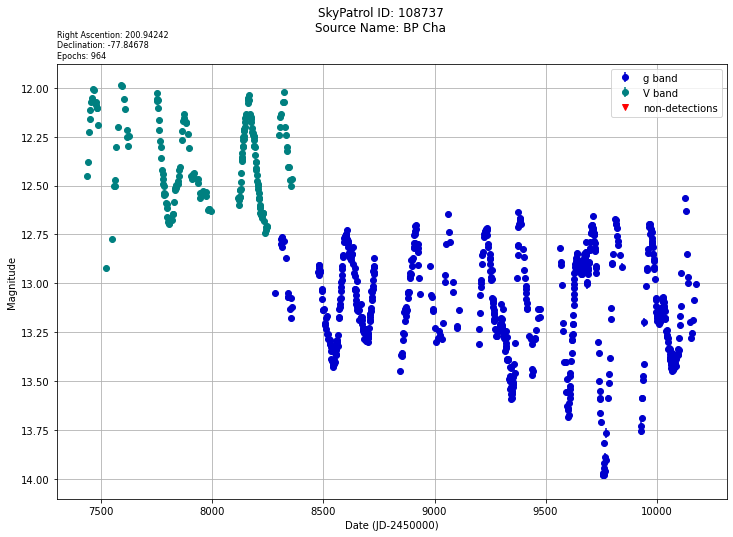

In [15]:
lightcurve.plot(phot_filter='all')

#### Lomb Scargle and Find Period

Each lightcurve object has a method that runs the astropy implementation of lomb scargle that generates a power spectrum.

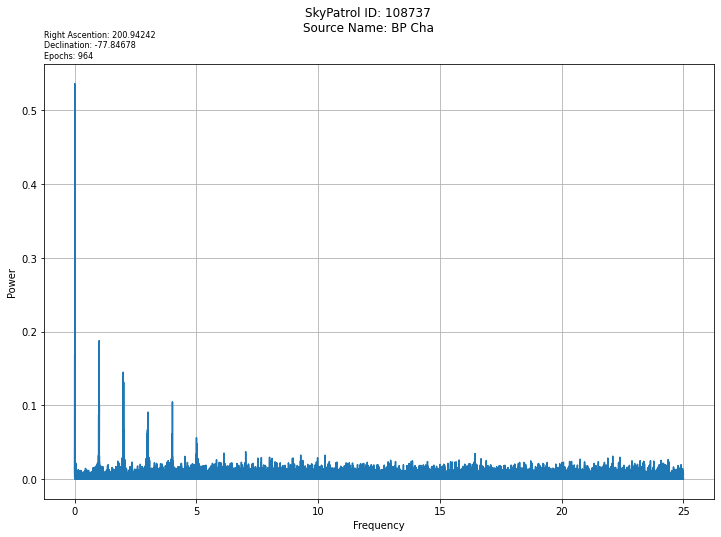

In [24]:
frequency, power, ls = lightcurve.lomb_scargle(plot=True, phot_filter='g')

#### Phase Folding

From the power spectrum we can determin the period of the light curve and generate a phase folded light curve.

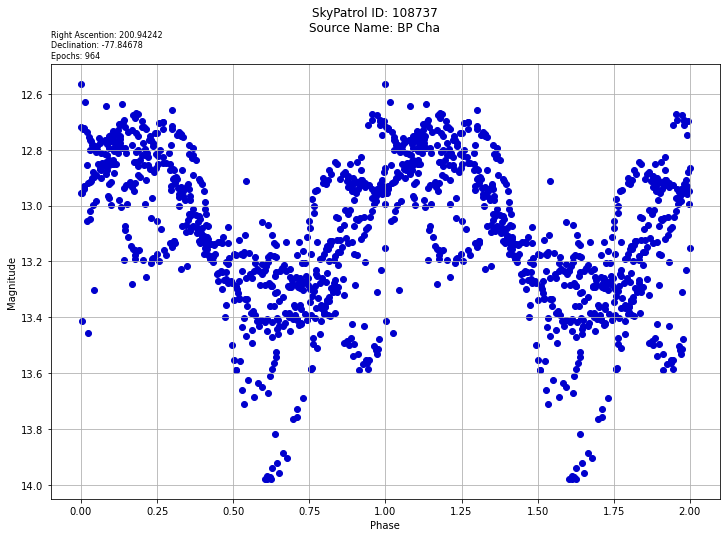

In [25]:
period = lightcurve.find_period(frequency, power, plot=True, phot_filter='g')

#### Additional Analysis Tools

Additional user built tools for processing and analysis of light curves. Includes normalization for inter-camera calibration, wavelet transforms, anomaly removal.

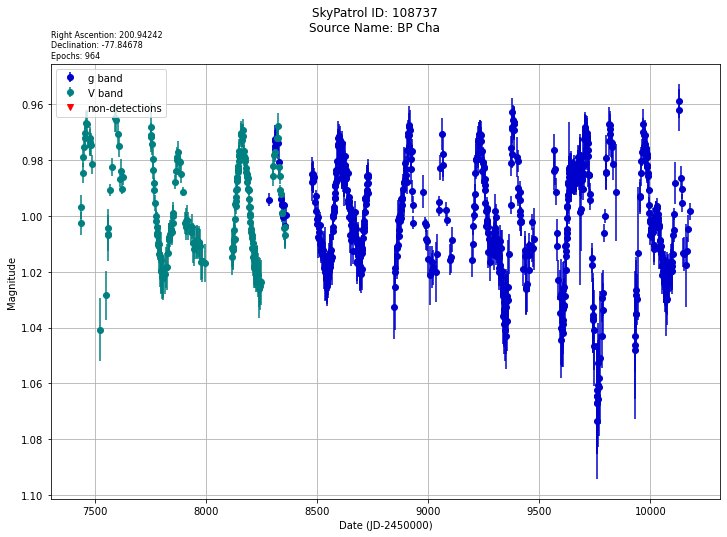

In [21]:
lightcurve.normalize().plot()

  0%|          | 0/600 [00:00<?, ?it/s]

array([[70.05448234, 72.46290205, 74.8513497 , ...,  4.98319507,
         5.01283536,  5.04085326],
       [70.05812133, 72.46691732, 74.85576264, ...,  5.02269248,
         5.05268647,  5.08102674],
       [70.06174673, 72.47091753, 74.86015897, ...,  5.06292743,
         5.09327326,  5.1219336 ],
       ...,
       [68.59941379, 70.83597978, 73.03815572, ..., 36.31170983,
        36.2821837 , 36.24762911],
       [68.59222398, 70.82800358, 73.02933905, ..., 36.0464979 ,
        36.01639114, 35.98132648],
       [68.58502144, 70.82001336, 73.02050698, ..., 35.78038675,
        35.74970814, 35.71414177]])

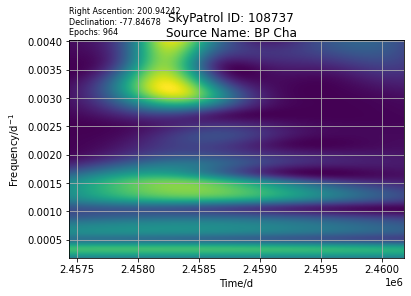

In [23]:
lightcurve.wavelet_power()

#### Saving

Finally, we can save the individual light curve or the entire collection to .csv

In [23]:
# Individual
lightcurve.save(path="bp_cha.csv")
# Collection
lcs.save(save_dir="tmp/")